## **Data Preprocessing and Exploratory Data Analysis (EDA)**

**1. Loading the dataset**

In [21]:
# Load the dataset
import pandas as pd
data = pd.read_csv('tips (data for regression problem).csv')

In [22]:
# Display the first few rows of the dataset
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


**2. Data Cleaning**

In [23]:
# Data Cleaning
print(data.isnull().sum())

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


**3. Descriptive Statistics**

In [24]:
# Get an overview of data statistics
data.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


**4. EDA for Relationships**

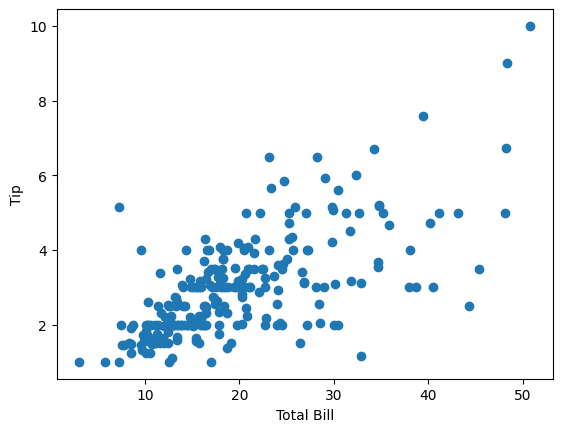

In [25]:
# Scatter plots
import matplotlib.pyplot as plt
plt.scatter(data['total_bill'], data['tip'])
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()

In [26]:
# Pair plots
import seaborn as sns
# sns.pairplot(data)
# plt.show()

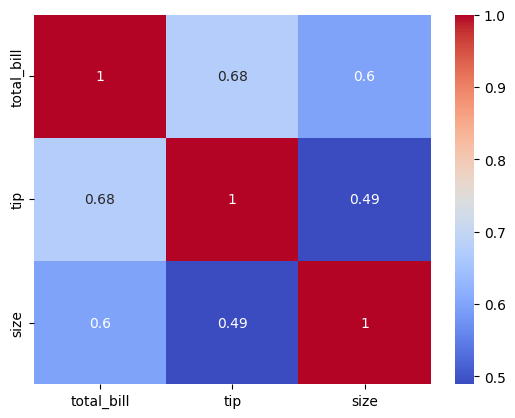

In [27]:
# Correlation Matrix
numeric_data = data.select_dtypes(include=['number'])
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.show()

## **Check for Linearity**

**1. Rainbow Test for Linearity**

In [28]:
# Run the Rainbow Test
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_rainbow

X = data[['total_bill', 'size']]  # Example features
X = sm.add_constant(X)
y = data['tip']

model = sm.OLS(y, X).fit()
rainbow_stat, rainbow_p_value = linear_rainbow(model)
print('Rainbow test p-value:', rainbow_p_value)


Rainbow test p-value: 0.17048935693447384


**2. Residual Plot**

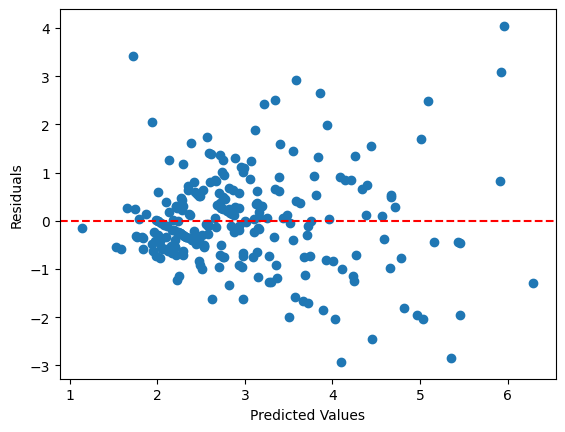

In [29]:
predictions = model.predict(X)
residuals = y - predictions
plt.scatter(predictions, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(0, color='red', linestyle='--')
plt.show()

**3. Line Plot**

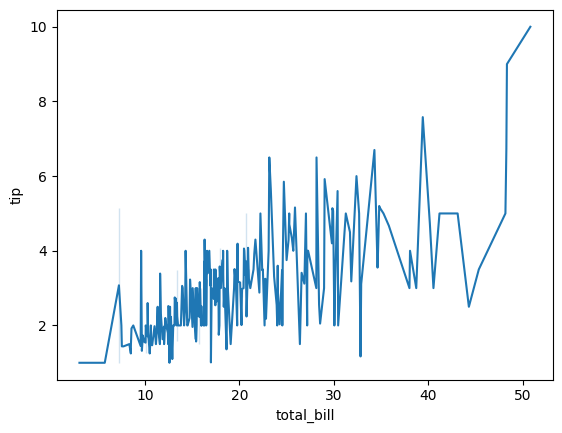

In [30]:
# Line plot: Plotting 'total_bill' vs 'tip'
sns.lineplot(data=data, x='total_bill', y='tip')
plt.show()

## **Build Predictive Models**

**1. Split the Data**

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[['total_bill', 'size']], data['tip'], test_size=0.2, random_state=42)

**2. Implement Models**

In [32]:
# Linear Regresson
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

In [33]:
# Ridge and Lasso
from sklearn.linear_model import Ridge, Lasso
model_ridge = Ridge(alpha=1.0).fit(X_train, y_train)
model_lasso = Lasso(alpha=0.1).fit(X_train, y_train)

In [34]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
model_tree = DecisionTreeRegressor().fit(X_train, y_train)

In [35]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)

In [36]:
# Support Vector Regression
from sklearn.svm import SVR
model_svr = SVR().fit(X_train, y_train)

In [37]:
# K - Nearest Neighbors
from sklearn.neighbors import KNeighborsRegressor
model_knn = KNeighborsRegressor(n_neighbors=5).fit(X_train, y_train)

## **Model Evaluation**

**1. Performance Metrics**

In [40]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the evaluation function
def evaluate_model(model, X_test, y_test):
    # Predict on the test set
    predictions = model.predict(X_test)
    
    # Calculate performance metrics
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    
    # Print the metrics
    print(f'MAE: {mae}, MSE: {mse}, R2: {r2}')

# Now you can evaluate the models
evaluate_model(model_lr, X_test, y_test)
evaluate_model(model_ridge, X_test, y_test)
evaluate_model(model_lasso, X_test, y_test)
evaluate_model(model_tree, X_test, y_test)
evaluate_model(model_rf, X_test, y_test)
evaluate_model(model_svr, X_test, y_test)
evaluate_model(model_knn, X_test, y_test)


MAE: 0.6639235737596481, MSE: 0.6485996190543516, R2: 0.4811084097989491
MAE: 0.6635062841685713, MSE: 0.6476315567917146, R2: 0.48188287736278423
MAE: 0.6374841046500828, MSE: 0.5908528649971523, R2: 0.5273068720881756
MAE: 0.8236734693877551, MSE: 1.0154163265306122, R2: 0.18764831660280956
MAE: 0.7365551020408159, MSE: 0.8336970697052163, R2: 0.3330270546935905
MAE: 0.560706822390504, MSE: 0.5347569437369007, R2: 0.5721846378644853
MAE: 0.7211428571428571, MSE: 0.7436584489795918, R2: 0.4050596025324963


## **Insights and Recommendations**

In [39]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Initialize and train the Random Forest model
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

# Extract feature importances
importances = rf.feature_importances_

# Ensure consistency by using columns from X_train
feature_importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# Print the feature importance DataFrame
print(feature_importance_df)


      feature  importance
0  total_bill    0.905978
1        size    0.094022
